In [259]:
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import MySQLdb
import time
import datetime
import warnings
warnings.filterwarnings("ignore")
from imp import reload
import chan
import chan_series

In [260]:
token1='3aceab1cc8a61e74fc0a1d481d64bf0b6d4e177a90f4c3936014c0ac'
token2='78a305b2dd06977416b082bd41770fb58540b9019c99cd5a0ba0df1e'
token3='a8497d286ccc9517019323199c835e7043716d18d38fd6fe0c4f8d01'
token4='6c8d14fbeef89d16196b2b63e0cd308a852e9be716800b80fa49d976'
token5='bdcbd354164b0fe40b2e2b563eced15f2301c70a37704f30752b8519'
token_current=1
ts.set_token(token1)
pro = ts.pro_api()

In [262]:
for year in range(2010,2020):
    for month in range(1,13):
        start_year_str=str(year)
        end_year_str=str(year) if month<12 else str(year+1)
        start_month_str=str(month) if month>9 else '0'+str(month)
        end_month_str=( str(month+1) if month+1>9 else '0'+str(month+1) ) if month<12 else '01'
        start_date=start_year_str+start_month_str+'01'
        end_date=end_year_str+end_month_str+'02'
        print(start_date,end_date)
        
        stock_df=None
        has_gotdata=False
        time_out_n=0
        while not has_gotdata:
            try:
                stock_df = ts.pro_bar(ts_code='000425.SZ', asset='E', freq='1min', start_date=start_date, end_date=end_date)
                has_gotdata=True
            except OSError as e:
                print('超频'+str(time_out_n)+'次，换token或sleep... token_current',token_current)
                time_out_n+=1
                if time_out_n>1:
                    time.sleep(10)
                if token_current==1:
                    ts.set_token(token2)
                    pro = ts.pro_api()
                    token_current=2
                elif token_current==2:
                    ts.set_token(token3)
                    pro = ts.pro_api()
                    token_current=3
                elif token_current==3:
                    ts.set_token(token4)
                    pro = ts.pro_api()
                    token_current=4
                elif token_current==4:
                    ts.set_token(token5)
                    pro = ts.pro_api()
                    token_current=5
                elif token_current==5:
                    ts.set_token(token1)
                    pro = ts.pro_api()
                    token_current=1
                else:
                    time.sleep(10)

        stock_dfr = stock_df.iloc[::-1] #倒序
        stock_n_dr = len(stock_dfr)
        stock_df_dr = stock_dfr.iloc[-stock_n_dr:-1]
        stock_df_dr.index=stock_df_dr.index.map(lambda x:stock_n_dr-x)
        #写数据库
        insert_data = []
        for n, k in stock_df_dr.iterrows():             
            ts_code=k.ts_code
            trade_time=datetime.datetime.strptime(k.trade_time,'%Y-%m-%d %H:%M:%S')
            openn=float(k.open)
            close=float(k.close)
            high=float(k.high)
            low=float(k.low)
            vol=int(k.vol)
            amount=int(k.amount)            
            trade_date=datetime.datetime.strptime(k.trade_date,'%Y%m%d')
            pre_close=float(k.pre_close)
            if n>1: #第一个pre_close是NaN
                insert_data.append((ts_code,trade_time,openn,close,high,low,vol,amount,trade_date,pre_close))
        db = MySQLdb.connect(host="127.0.0.1",user="sa",passwd="sasasa",db="quant",charset="utf8")
        cursor = db.cursor()
        try:        
            sql='insert ignore into stock_min (ts_code,trade_time,open,close,high,low,vol,amount,trade_date,pre_close) \
            values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
            cursor.executemany(sql,insert_data)
            db.commit()
        except Exception as e:
            print('插数据库错误：',e)
        cursor.close()
        db.close()

20100101 20100202
20100201 20100302
20100301 20100402
20100401 20100502
20100501 20100602
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep... token_current 5
20100601 20100702
20100701 20100802
20100801 20100902
20100901 20101002
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep... token_current 1
20101001 20101102
20101101 20101202
20101201 20110102
20110101 20110202
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep... token_current 2
20110201 20110302
2011030

20181001 20181102
20181101 20181202
20181201 20190102
20190101 20190202
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep... token_current 1
20190201 20190302
20190301 20190402
20190401 20190502
20190501 20190602
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep... token_current 2
20190601 20190702
20190701 20190802
20190801 20190902
20190901 20191002
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep... token_current 3
20191001 20191102
20191101 20191202
2019120

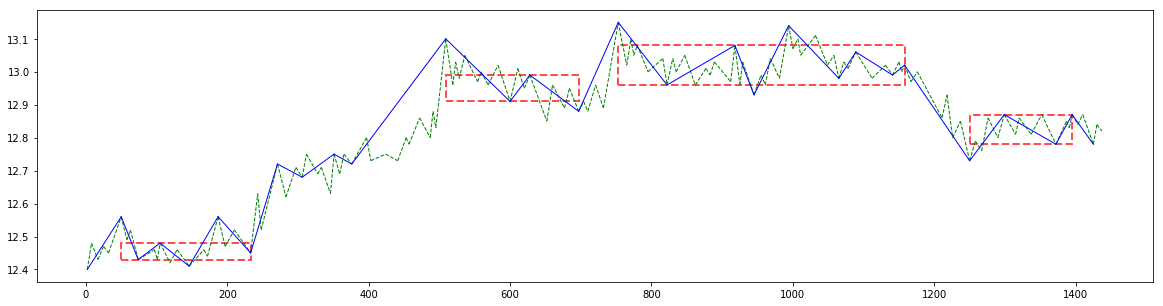

In [258]:
reload(chan_series) #重新加载外部chan.py
df = ts.pro_bar(ts_code='600060.SH', asset='E', freq='1min', start_date='20101210', end_date='20101220')
dfr = df.iloc[::-1] #倒序
n_dr = len(dfr)
df_dr = dfr.iloc[-n_dr:-1]
df_dr.index=df_dr.index.map(lambda x:n_dr-x)
df_dr=chan_series.build(df_dr)
# #画图
plt.figure(figsize=(20,5),dpi=72)
# for n, k in df_dr.iterrows():
#     is_group = k.group
#     is_group_master = k.group_master
#     is_bi = k.bi
#     fx = k.fx
#     low = k.low
#     high = k.high    
#     #画矩形
#     color = 'y' 
#     if fx=='top':
#         color = 'r'
#     if fx=='bottom':
#         color = 'b'
# #     if k.group==False:
# #         color='b'
# #     if k.group_master:
# #         color='g'
#     bar_high = high-low if high-low!=0 else 0.005
#     plt.bar(n, bar_high, 0.8, low, color=color) 
#画笔
draw_node_n_pre=None
draw_node_y_pre=None
for n, k in df_dr[df_dr.bi!=''].iterrows():
    is_bi = k.bi
    fx_type = k.fx
    low = k.low
    high = k.high 
    if is_bi:
        y=low if fx_type=='bottom' else high
        if draw_node_n_pre!=None:
            plt.plot([draw_node_n_pre,n],[draw_node_y_pre,y],'g--',lw=1)
        draw_node_n_pre=n
        draw_node_y_pre=y
        
#画线段
draw_dot_n_pre=None
draw_dot_y_pre=None
for n, k in df_dr[df_dr.line!=''].iterrows():
    line_type = k.line
    low = k.low
    high = k.high 
    if line_type=="top" or line_type=='bottom':
        y=low if line_type=='bottom' else high
        if draw_dot_n_pre!=None:
            plt.plot([draw_dot_n_pre,n],[draw_dot_y_pre,y],'b-',lw=1)
        draw_dot_n_pre=n
        draw_dot_y_pre=y
#画中枢
draw_zs_no_pre=0
draw_zg_pre=0
draw_zd_pre=0
draw_zs_start_n_pre=0
draw_zs_n_pre=0
for n, k in df_dr[df_dr.zs_no>0].iterrows():
    zg = k.zg
    zd = k.zd
    zs_no = k.zs_no
    if draw_zs_no_pre!=zs_no: #开始了新的中枢，画上一个
        if draw_zs_no_pre!=0: 
            #print(draw_zs_start_n_pre,draw_zg_pre,draw_zd_pre,draw_zs_n_pre-draw_zs_start_n_pre,draw_zd_pre)
            plt.bar((draw_zs_start_n_pre+draw_zs_n_pre)/2,draw_zg_pre-draw_zd_pre,draw_zs_n_pre-draw_zs_start_n_pre,draw_zd_pre, color='w',alpha=0.7, edgecolor='r', ls='--',lw=2)
        draw_zs_start_n_pre=n
        draw_zs_no_pre=zs_no
        draw_zg_pre=zg
        draw_zd_pre=zd
    draw_zs_n_pre=n
if draw_zs_no_pre!=0: #画最后一个
    #print(draw_zs_start_n_pre,draw_zg_pre,draw_zd_pre,draw_zs_n_pre-draw_zs_start_n_pre,draw_zd_pre)
    plt.bar((draw_zs_start_n_pre+draw_zs_n_pre)/2,draw_zg_pre-draw_zd_pre,draw_zs_n_pre-draw_zs_start_n_pre,draw_zd_pre, color='w',alpha=0.7, edgecolor='r', ls='--',lw=2)
plt.show()

In [255]:
df_dr[df_dr.line!='']

ts_code           trade_time   open  close   high    low       vol  \
13   600060.SH  2010-09-06 09:42:00  13.21  13.21  13.25  13.20   75100.0   
45   600060.SH  2010-09-06 10:14:00  13.47  13.44  13.47  13.44  110147.0   
89   600060.SH  2010-09-06 10:58:00  13.22  13.23  13.23  13.21   48500.0   
104  600060.SH  2010-09-06 11:13:00  13.26  13.26  13.27  13.26   43687.0   
121  600060.SH  2010-09-06 11:30:00  13.25  13.26  13.26  13.23   38200.0   
138  600060.SH  2010-09-06 13:17:00  13.30  13.27  13.30  13.27   40782.0   
189  600060.SH  2010-09-06 14:08:00  13.18  13.16  13.18  13.15  268200.0   
253  600060.SH  2010-09-07 09:41:00  13.32  13.33  13.34  13.30   68100.0   
352  600060.SH  2010-09-07 11:20:00  13.06  13.06  13.06  13.05   79976.0   
395  600060.SH  2010-09-07 13:33:00  13.13  13.18  13.18  13.11   57100.0   
438  600060.SH  2010-09-07 14:16:00  13.05  13.05  13.06  13.04   45000.0   
569  600060.SH  2010-09-08 10:56:00  13.34  13.33  13.35  13.33  210500.0   
624  600060.SH  2010-09-08 13:21:00  13.28  13.27  13.28  13.26    9200.0   
681  600060.SH  2010-09-08 14:18:00  13.41  13.40  13.42  13.40   87800.0   
711  600060.SH  2010-09-08 14:48:00  13.36  13.37  13.37  13.35   50100.0   

        amount trade_date  pre_close        ...             bi    line zs_no  \
13    992627.0   20100906      13.25        ...         bottom  bottom     0   
45   1482095.0   20100906      13.46        ...            top     top     1   
89    641255.0   20100906      13.22        ...         bottom  bottom     1   
104   579520.0   20100906      13.27        ...            top     top     1   
121   505801.0   20100906      13.25        ...         bottom  bottom     1   
138   541366.0   20100906      13.30        ...            top     top     1   
189  3532819.0   20100906      13.18        ...         bottom  bottom     1   
253   906972.0   20100907      13.32        ...            top     top     1   
352  1043975.0   20100907      13.06        ...         bottom  bottom     0   
395   749641.0   20100907      13.13        ...            top     top     0   
438   587310.0   20100907      13.05        ...         bottom  bottom     0   
569  2808451.0   20100908      13.33        ...            top     top     0   
624   122089.0   20100908      13.26        ...         bottom  bottom     0   
681  1177601.0   20100908      13.41        ...            top     top     0   
711   669323.0   20100908      13.35        ...         bottom  bottom     0   

        zg     zd     gg     dd zs_direction      zs_confirm_time  \
13    0.00   0.00   0.00   0.00                                     
45   13.27  13.23  13.47  13.15       updown  2010-09-07 13:19:00   
89   13.27  13.23  13.47  13.15       updown  2010-09-07 13:19:00   
104  13.27  13.23  13.47  13.15       updown  2010-09-07 13:19:00   
121  13.27  13.23  13.47  13.15       updown  2010-09-07 13:19:00   
138  13.27  13.23  13.47  13.15       updown  2010-09-07 13:19:00   
189  13.27  13.23  13.47  13.15       updown  2010-09-07 13:19:00   
253  13.27  13.23  13.47  13.15       updown  2010-09-07 13:19:00   
352   0.00   0.00   0.00   0.00                                     
395   0.00   0.00   0.00   0.00                                     
438   0.00   0.00   0.00   0.00                                     
569   0.00   0.00   0.00   0.00                                     
624   0.00   0.00   0.00   0.00                                     
681   0.00   0.00   0.00   0.00                                     
711   0.00   0.00   0.00   0.00                                     

     zs_confirm_price  
13                     
45              13.13  
89              13.13  
104             13.13  
121             13.13  
138             13.13  
189             13.13  
253             13.13  
352                    
395                    
438                    
569                    
624                    
681                    
711                    

[15

In [4]:
stock_list = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

In [7]:
reload(chan) #重新加载外部chan.py

result_df=pd.DataFrame()
found_qs_count=0
for stock_n, stock_k in stock_list.iterrows():
    print('Start',stock_n,stock_k.ts_code)
    try:
        stock_df=None
        has_gotdata=False
        time_out_n=0
        while not has_gotdata:
            try:
                stock_df = ts.pro_bar(ts_code=stock_k.ts_code, asset='E', freq='1min', start_date='20190925', end_date='20191108')
                has_gotdata=True
            except OSError as e:
                print('超频'+str(time_out_n)+'次，换token或sleep...')
                time_out_n+=1
                if time_out_n>1:
                    time.sleep(10)
                if token_current==1:
                    ts.set_token(token2)
                    token_current=2
                else:
                    ts.set_token(token1)
                    token_current=1

        stock_dfr = stock_df.iloc[::-1] #倒序
        stock_n_dr = len(stock_dfr)
        stock_df_dr = stock_dfr.iloc[-stock_n_dr:-1]
        stock_df_dr.index=stock_df_dr.index.map(lambda x:stock_n_dr-x)
        #写数据库
        insert_data = []
        for n, k in stock_df_dr.iterrows():             
            ts_code=k.ts_code
            trade_time=datetime.datetime.strptime(k.trade_time,'%Y-%m-%d %H:%M:%S')
            openn=float(k.open)
            close=float(k.close)
            high=float(k.high)
            low=float(k.low)
            vol=int(k.vol)
            amount=int(k.amount)            
            trade_date=datetime.datetime.strptime(k.trade_date,'%Y%m%d')
            pre_close=float(k.pre_close)
            if n>1: #第一个pre_close是NaN
                insert_data.append((ts_code,trade_time,openn,close,high,low,vol,amount,trade_date,pre_close))
        db = MySQLdb.connect(host="127.0.0.1",user="sa",passwd="sasasa",db="quant",charset="utf8")
        cursor = db.cursor()
        try:        
            sql='insert ignore into stock_min (ts_code,trade_time,open,close,high,low,vol,amount,trade_date,pre_close) \
            values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
            cursor.executemany(sql,insert_data)
            db.commit()
        except Exception as e:
            print('插数据库错误：',e)
        cursor.close()
        db.close()
        
        #构建chan
        stock_df_dr=chan.build(stock_df_dr)
        
        found_count=0 #符合趋势的本组中枢已找到个数
        zs_no_pre=0
        zs_zg_pre=0
        zs_zd_pre=0    
        zs_gg_pre=0
        zs_dd_pre=0
        zs_direction_pre=''
        for n, k in stock_df_dr.loc[(stock_df_dr["line"]=='bottom') | (stock_df_dr["line"]=='top')].iterrows():
            #print(k.zs_no, n, zs_no_pre==0 , k.zs_no>zs_no_pre)
            if k.zs_no!=0 and (zs_no_pre==0 or k.zs_no>zs_no_pre): #新中枢
                #print(stock_n,n,"新中枢",k.zs_no,k.zs_direction)
                if found_count==0 and (k.zs_direction=='downdown' or k.zs_direction=='upup'):
                    found_count=found_count+1
                else: #前面已经找到一个待确认的
                    if zs_direction_pre=='downdown' and k.zs_direction=='downdown' and k.gg<zs_dd_pre: #与前面的方向一致
                        found_count=found_count+1
                        #print('下降趋势延申')
                    elif zs_direction_pre=='upup' and k.zs_direction=='upup' and k.dd>zs_gg_pre: #与前面的方向一致
                        found_count=found_count+1
                        #print('上升趋势延申')
                    elif k.zs_direction=='upup' or k.zs_direction=='downdown': #盘整中枢，结束
                        found_count=0
                        #print('×盘整中枢，重新找')
                    elif zs_direction_pre!=k.zs_direction: #与前面的方向不一致，作为第一个继续往下找
                        found_count=1
                        #print('×与之前方向不同，作为第一个往下找')
                    else: #不成趋势
                        found_count=1
                        #print('×条件不符合，作为第一个往下找')
                    if found_count>2: #找到三个，记录
                        found_qs_count=found_qs_count+1
                        result_df=result_df.append({'ts_code':stock_k.ts_code, 'trade_time':k.zs_confirm_time, 'trade_price':k.zs_confirm_price, 'n':n, 'direction': k.zs_direction},ignore_index=True)
                        print('√找到三个连续符合中枢',stock_k.ts_code, k.zs_confirm_time, k.zs_no)
                        found_count=0
                zs_no_pre=k.zs_no
                zs_zg_pre=k.zg
                zs_zd_pre=k.zg    
                zs_gg_pre=k.gg
                zs_dd_pre=k.dd
                zs_direction_pre=k.zs_direction
            elif k.zs_no==0 and found_count>0:
                line_point=k.high if k.line=='top' else k.low
                if (zs_direction_pre=='upup' and line_point<zs_gg_pre) or (zs_direction_pre=='downdown' and line_point>zs_dd_pre): #连接线段触碰前中枢
                    found_count=0
                    #print('×连接不符合')
    except Exception as e:
        print(stock_k.ts_code,'发生异常：',e)
        
    print('End',stock_k.ts_code,'已找到趋势个数：',found_qs_count)
       
    

Start 0 000001.SZ
End 000001.SZ 已找到趋势个数： 0
Start 1 000002.SZ
End 000002.SZ 已找到趋势个数： 0
Start 2 000004.SZ
End 000004.SZ 已找到趋势个数： 0
Start 3 000005.SZ
End 000005.SZ 已找到趋势个数： 0
Start 4 000006.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 000006.SZ 已找到趋势个数： 0
Start 5 000007.SZ
End 000007.SZ 已找到趋势个数： 0
Start 6 000008.SZ
End 000008.SZ 已找到趋势个数： 0
Start 7 000009.SZ
End 000009.SZ 已找到趋势个数： 0
Start 8 000010.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 000010.SZ 已找到趋势个数： 0
Start 9 000011.SZ
End 000011.SZ 已找到趋势个数： 0
Start 10 000012.SZ
End 000012.SZ 已找到趋势个数： 0
Start 11 000014.SZ
End 000014.SZ 已找到趋势个数： 0
Start 12 000016.SZ
E

End 000531.SZ 已找到趋势个数： 4
Start 124 000532.SZ
End 000532.SZ 已找到趋势个数： 4
Start 125 000533.SZ
End 000533.SZ 已找到趋势个数： 4
Start 126 000534.SZ
√找到三个连续符合中枢 000534.SZ 2019-11-05 14:48:00 9
End 000534.SZ 已找到趋势个数： 5
Start 127 000536.SZ
End 000536.SZ 已找到趋势个数： 5
Start 128 000537.SZ
End 000537.SZ 已找到趋势个数： 5
Start 129 000538.SZ
End 000538.SZ 已找到趋势个数： 5
Start 130 000539.SZ
End 000539.SZ 已找到趋势个数： 5
Start 131 000540.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 000540.SZ 已找到趋势个数： 5
Start 132 000541.SZ
End 000541.SZ 已找到趋势个数： 5
Start 133 000543.SZ
End 000543.SZ 已找到趋势个数： 5
Start 134 000544.SZ
End 000544.SZ 已找到趋势个数： 5
Start 135 000545.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pr

√找到三个连续符合中枢 000698.SZ 2019-10-30 10:43:00 3
End 000698.SZ 已找到趋势个数： 9
Start 247 000700.SZ
End 000700.SZ 已找到趋势个数： 9
Start 248 000701.SZ
End 000701.SZ 已找到趋势个数： 9
Start 249 000702.SZ
End 000702.SZ 已找到趋势个数： 9
Start 250 000703.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 000703.SZ 已找到趋势个数： 9
Start 251 000705.SZ
End 000705.SZ 已找到趋势个数： 9
Start 252 000707.SZ
End 000707.SZ 已找到趋势个数： 9
Start 253 000708.SZ
End 000708.SZ 已找到趋势个数： 9
Start 254 000709.SZ
End 000709.SZ 已找到趋势个数： 9
Start 255 000710.SZ
End 000710.SZ 已找到趋势个数： 9
Start 256 000711.SZ
End 000711.SZ 已找到趋势个数： 9
Start 257 000712.SZ
End 000712.SZ 已找到趋势个数： 9
Start 258 000713.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pr

End 000833.SZ 已找到趋势个数： 12
Start 342 000835.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 000835.SZ 已找到趋势个数： 12
Start 343 000836.SZ
End 000836.SZ 已找到趋势个数： 12
Start 344 000837.SZ
End 000837.SZ 已找到趋势个数： 12
Start 345 000838.SZ
End 000838.SZ 已找到趋势个数： 12
Start 346 000839.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 000839.SZ 已找到趋势个数： 12
Start 347 000848.SZ
End 000848.SZ 已找到趋势个数： 12
Start 348 000850.SZ
End 000850.SZ 已找到趋势个数： 12
Start 349 000851.SZ
End 000851.SZ 已找到趋势个数： 12
Start 350 000852.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/documen

End 000982.SZ 已找到趋势个数： 14
Start 443 000983.SZ
End 000983.SZ 已找到趋势个数： 14
Start 444 000985.SZ
End 000985.SZ 已找到趋势个数： 14
Start 445 000987.SZ
End 000987.SZ 已找到趋势个数： 14
Start 446 000988.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 000988.SZ 已找到趋势个数： 14
Start 447 000989.SZ
End 000989.SZ 已找到趋势个数： 14
Start 448 000990.SZ
End 000990.SZ 已找到趋势个数： 14
Start 449 000993.SZ
End 000993.SZ 已找到趋势个数： 14
Start 450 000996.SZ
End 000996.SZ 已找到趋势个数： 14
Start 451 000997.SZ
End 000997.SZ 已找到趋势个数： 14
Start 452 000998.SZ
End 000998.SZ 已找到趋势个数： 14
Start 453 000999.SZ
End 000999.SZ 已找到趋势个数： 14
Start 454 001696.SZ
End 001696.SZ 已找到趋势个数： 14
Start 455 001872.SZ
End 001872.SZ 已找到趋势个数： 14
Start 456 001896.SZ
End 001896.SZ 已找到趋势个数： 14
Start 457 001965.SZ
End 001965.SZ 已找到趋势个数： 14
Start 458 001979.SZ
End 001979.SZ 已找到趋势个数： 14
Start 4

End 002119.SZ 已找到趋势个数： 16
Start 576 002120.SZ
End 002120.SZ 已找到趋势个数： 16
Start 577 002121.SZ
End 002121.SZ 已找到趋势个数： 16
Start 578 002122.SZ
End 002122.SZ 已找到趋势个数： 16
Start 579 002123.SZ
End 002123.SZ 已找到趋势个数： 16
Start 580 002124.SZ
End 002124.SZ 已找到趋势个数： 16
Start 581 002125.SZ
End 002125.SZ 已找到趋势个数： 16
Start 582 002126.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 002126.SZ 已找到趋势个数： 16
Start 583 002127.SZ
End 002127.SZ 已找到趋势个数： 16
Start 584 002128.SZ
End 002128.SZ 已找到趋势个数： 16
Start 585 002129.SZ
End 002129.SZ 已找到趋势个数： 16
Start 586 002130.SZ
End 002130.SZ 已找到趋势个数： 16
Start 587 002131.SZ
End 002131.SZ 已找到趋势个数： 16
Start 588 002132.SZ
End 002132.SZ 已找到趋势个数： 16
Start 589 002133.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document

End 002252.SZ 已找到趋势个数： 16
Start 709 002253.SZ
End 002253.SZ 已找到趋势个数： 16
Start 710 002254.SZ
End 002254.SZ 已找到趋势个数： 16
Start 711 002255.SZ
End 002255.SZ 已找到趋势个数： 16
Start 712 002256.SZ
End 002256.SZ 已找到趋势个数： 16
Start 713 002258.SZ
End 002258.SZ 已找到趋势个数： 16
Start 714 002259.SZ
End 002259.SZ 已找到趋势个数： 16
Start 715 002261.SZ
End 002261.SZ 已找到趋势个数： 16
Start 716 002262.SZ
End 002262.SZ 已找到趋势个数： 16
Start 717 002263.SZ
End 002263.SZ 已找到趋势个数： 16
Start 718 002264.SZ
End 002264.SZ 已找到趋势个数： 16
Start 719 002265.SZ
End 002265.SZ 已找到趋势个数： 16
Start 720 002266.SZ
End 002266.SZ 已找到趋势个数： 16
Start 721 002267.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 002267.SZ 已找到趋势个数： 16
Start 722 002268.SZ
End 002268.SZ 已找到趋势个数： 16
Start 723 002269.SZ
End 002269.SZ 已找到趋势个数： 16
Start 724 002270.SZ
End 002270.SZ 已找到趋势个数： 16
Start 7

End 002401.SZ 已找到趋势个数： 18
Start 856 002402.SZ
End 002402.SZ 已找到趋势个数： 18
Start 857 002403.SZ
End 002403.SZ 已找到趋势个数： 18
Start 858 002404.SZ
End 002404.SZ 已找到趋势个数： 18
Start 859 002405.SZ
End 002405.SZ 已找到趋势个数： 18
Start 860 002406.SZ
End 002406.SZ 已找到趋势个数： 18
Start 861 002407.SZ
End 002407.SZ 已找到趋势个数： 18
Start 862 002408.SZ
End 002408.SZ 已找到趋势个数： 18
Start 863 002409.SZ
End 002409.SZ 已找到趋势个数： 18
Start 864 002410.SZ
End 002410.SZ 已找到趋势个数： 18
Start 865 002411.SZ
End 002411.SZ 已找到趋势个数： 18
Start 866 002412.SZ
End 002412.SZ 已找到趋势个数： 18
Start 867 002413.SZ
End 002413.SZ 已找到趋势个数： 18
Start 868 002414.SZ
End 002414.SZ 已找到趋势个数： 18
Start 869 002415.SZ
End 002415.SZ 已找到趋势个数： 18
Start 870 002416.SZ
End 002416.SZ 已找到趋势个数： 18
Start 871 002417.SZ
End 002417.SZ 已找到趋势个数： 18
Start 872 002418.SZ
√找到三个连续符合中枢 002418.SZ 2019-10-31 14:16:00 7
End 002418.SZ 已找到趋势个数： 19
Start 873 002419.SZ
End 002419.SZ 已找到趋势个数： 19
Start 874 002420.SZ
End 002420.SZ 已找到趋势个数： 19
Start 875 002421.SZ
End 002421.SZ 已找到趋势个数： 19
Start 876 

抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 002529.SZ 已找到趋势个数： 21
Start 982 002530.SZ
End 002530.SZ 已找到趋势个数： 21
Start 983 002531.SZ
End 002531.SZ 已找到趋势个数： 21
Start 984 002532.SZ
√找到三个连续符合中枢 002532.SZ 2019-10-31 11:30:00 6
End 002532.SZ 已找到趋势个数： 22
Start 985 002533.SZ
End 002533.SZ 已找到趋势个数： 22
Start 986 002534.SZ
End 002534.SZ 已找到趋势个数： 22
Start 987 002535.SZ
End 002535.SZ 已找到趋势个数： 22
Start 988 002536.SZ
End 002536.SZ 已找到趋势个数： 22
Start 989 002537.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 002537.SZ 已找到趋势个数： 22
Start 990 002538.SZ
End 002538.SZ 已找到趋势个数： 22
Start 991 002539.SZ
End 002539.SZ 已找到趋势个数： 22
Start 992 002540.SZ
End 002540.SZ 已找到趋势个数： 22
Start 993 002541.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该

End 002645.SZ 已找到趋势个数： 24
Start 1097 002646.SZ
End 002646.SZ 已找到趋势个数： 24
Start 1098 002647.SZ
End 002647.SZ 已找到趋势个数： 24
Start 1099 002648.SZ
End 002648.SZ 已找到趋势个数： 24
Start 1100 002649.SZ
End 002649.SZ 已找到趋势个数： 24
Start 1101 002650.SZ
End 002650.SZ 已找到趋势个数： 24
Start 1102 002651.SZ
End 002651.SZ 已找到趋势个数： 24
Start 1103 002652.SZ
End 002652.SZ 已找到趋势个数： 24
Start 1104 002653.SZ
End 002653.SZ 已找到趋势个数： 24
Start 1105 002654.SZ
End 002654.SZ 已找到趋势个数： 24
Start 1106 002655.SZ
End 002655.SZ 已找到趋势个数： 24
Start 1107 002656.SZ
End 002656.SZ 已找到趋势个数： 24
Start 1108 002657.SZ
End 002657.SZ 已找到趋势个数： 24
Start 1109 002658.SZ
End 002658.SZ 已找到趋势个数： 24
Start 1110 002659.SZ
End 002659.SZ 已找到趋势个数： 24
Start 1111 002660.SZ
End 002660.SZ 已找到趋势个数： 24
Start 1112 002661.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 002661.SZ 已找到

End 002768.SZ 已找到趋势个数： 27
Start 1213 002769.SZ
End 002769.SZ 已找到趋势个数： 27
Start 1214 002770.SZ
End 002770.SZ 已找到趋势个数： 27
Start 1215 002771.SZ
End 002771.SZ 已找到趋势个数： 27
Start 1216 002772.SZ
End 002772.SZ 已找到趋势个数： 27
Start 1217 002773.SZ
End 002773.SZ 已找到趋势个数： 27
Start 1218 002774.SZ
End 002774.SZ 已找到趋势个数： 27
Start 1219 002775.SZ
End 002775.SZ 已找到趋势个数： 27
Start 1220 002776.SZ
End 002776.SZ 已找到趋势个数： 27
Start 1221 002777.SZ
End 002777.SZ 已找到趋势个数： 27
Start 1222 002778.SZ
End 002778.SZ 已找到趋势个数： 27
Start 1223 002779.SZ
End 002779.SZ 已找到趋势个数： 27
Start 1224 002780.SZ
End 002780.SZ 已找到趋势个数： 27
Start 1225 002781.SZ
End 002781.SZ 已找到趋势个数： 27
Start 1226 002782.SZ
End 002782.SZ 已找到趋势个数： 27
Start 1227 002783.SZ
End 002783.SZ 已找到趋势个数： 27
Start 1228 002785.SZ
End 002785.SZ 已找到趋势个数： 27
Start 1229 002786.SZ
End 002786.SZ 已找到趋势个数： 27
Start 1230 002787.SZ
End 002787.SZ 已找到趋势个数： 27
Start 1231 002788.SZ
End 002788.SZ 已找到趋势个数： 27
Start 1232 002789.SZ
End 002789.SZ 已找到趋势个数： 27
Start 1233 002790.SZ
End 002790.SZ

End 002945.SZ 已找到趋势个数： 30
Start 1376 002946.SZ
End 002946.SZ 已找到趋势个数： 30
Start 1377 002947.SZ
End 002947.SZ 已找到趋势个数： 30
Start 1378 002948.SZ
End 002948.SZ 已找到趋势个数： 30
Start 1379 002949.SZ
√找到三个连续符合中枢 002949.SZ 2019-10-25 09:31:00 5
End 002949.SZ 已找到趋势个数： 31
Start 1380 002950.SZ
End 002950.SZ 已找到趋势个数： 31
Start 1381 002951.SZ
End 002951.SZ 已找到趋势个数： 31
Start 1382 002952.SZ
End 002952.SZ 已找到趋势个数： 31
Start 1383 002953.SZ
End 002953.SZ 已找到趋势个数： 31
Start 1384 002955.SZ
End 002955.SZ 已找到趋势个数： 31
Start 1385 002956.SZ
End 002956.SZ 已找到趋势个数： 31
Start 1386 002957.SZ
End 002957.SZ 已找到趋势个数： 31
Start 1387 002958.SZ
√找到三个连续符合中枢 002958.SZ 2019-10-31 13:36:00 6
End 002958.SZ 已找到趋势个数： 32
Start 1388 002959.SZ
End 002959.SZ 已找到趋势个数： 32
Start 1389 002960.SZ
End 002960.SZ 已找到趋势个数： 32
Start 1390 002961.SZ
End 002961.SZ 已找到趋势个数： 32
Start 1391 002962.SZ
End 002962.SZ 已找到趋势个数： 32
Start 1392 002963.SZ
End 002963.SZ 已找到趋势个数： 32
Start 1393 002965.SZ
End 002965.SZ 已找到趋势个数： 32
Start 1394 002966.SZ
抱歉，您每分钟最多访问该接口5次，权限

End 300100.SZ 已找到趋势个数： 37
Start 1495 300101.SZ
End 300101.SZ 已找到趋势个数： 37
Start 1496 300102.SZ
End 300102.SZ 已找到趋势个数： 37
Start 1497 300103.SZ
End 300103.SZ 已找到趋势个数： 37
Start 1498 300105.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 300105.SZ 已找到趋势个数： 37
Start 1499 300106.SZ
End 300106.SZ 已找到趋势个数： 37
Start 1500 300107.SZ
End 300107.SZ 已找到趋势个数： 37
Start 1501 300108.SZ
End 300108.SZ 已找到趋势个数： 37
Start 1502 300109.SZ
√找到三个连续符合中枢 300109.SZ 2019-10-28 11:04:00 5
End 300109.SZ 已找到趋势个数： 38
Start 1503 300110.SZ
End 300110.SZ 已找到趋势个数： 38
Start 1504 300111.SZ
End 300111.SZ 已找到趋势个数： 38
Start 1505 300112.SZ
End 300112.SZ 已找到趋势个数： 38
Start 1506 300113.SZ
End 300113.SZ 已找到趋势个数： 38
Start 1507 300114.SZ
End 300114.SZ 已找到趋势个数： 38
Start 1508 300115.SZ
End 300115.SZ 已找到趋势个数： 38
Start 1509 300116.SZ
End 300116.SZ 已找到趋势个

End 300239.SZ 已找到趋势个数： 38
Start 1631 300240.SZ
End 300240.SZ 已找到趋势个数： 38
Start 1632 300241.SZ
End 300241.SZ 已找到趋势个数： 38
Start 1633 300242.SZ
End 300242.SZ 已找到趋势个数： 38
Start 1634 300243.SZ
End 300243.SZ 已找到趋势个数： 38
Start 1635 300244.SZ
End 300244.SZ 已找到趋势个数： 38
Start 1636 300245.SZ
End 300245.SZ 已找到趋势个数： 38
Start 1637 300246.SZ
End 300246.SZ 已找到趋势个数： 38
Start 1638 300247.SZ
End 300247.SZ 已找到趋势个数： 38
Start 1639 300248.SZ
End 300248.SZ 已找到趋势个数： 38
Start 1640 300249.SZ
End 300249.SZ 已找到趋势个数： 38
Start 1641 300250.SZ
End 300250.SZ 已找到趋势个数： 38
Start 1642 300251.SZ
End 300251.SZ 已找到趋势个数： 38
Start 1643 300252.SZ
End 300252.SZ 已找到趋势个数： 38
Start 1644 300253.SZ
End 300253.SZ 已找到趋势个数： 38
Start 1645 300254.SZ
End 300254.SZ 已找到趋势个数： 38
Start 1646 300255.SZ
End 300255.SZ 已找到趋势个数： 38
Start 1647 300256.SZ
End 300256.SZ 已找到趋势个数： 38
Start 1648 300257.SZ
√找到三个连续符合中枢 300257.SZ 2019-10-09 10:49:00 3
End 300257.SZ 已找到趋势个数： 39
Start 1649 300258.SZ
End 300258.SZ 已找到趋势个数： 39
Start 1650 300259.SZ
End 300259.SZ 已找

End 300366.SZ 已找到趋势个数： 43
Start 1757 300367.SZ
End 300367.SZ 已找到趋势个数： 43
Start 1758 300368.SZ
End 300368.SZ 已找到趋势个数： 43
Start 1759 300369.SZ
End 300369.SZ 已找到趋势个数： 43
Start 1760 300370.SZ
End 300370.SZ 已找到趋势个数： 43
Start 1761 300371.SZ
End 300371.SZ 已找到趋势个数： 43
Start 1762 300373.SZ
End 300373.SZ 已找到趋势个数： 43
Start 1763 300374.SZ
End 300374.SZ 已找到趋势个数： 43
Start 1764 300375.SZ
End 300375.SZ 已找到趋势个数： 43
Start 1765 300376.SZ
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 300376.SZ 已找到趋势个数： 43
Start 1766 300377.SZ
End 300377.SZ 已找到趋势个数： 43
Start 1767 300378.SZ
End 300378.SZ 已找到趋势个数： 43
Start 1768 300379.SZ
End 300379.SZ 已找到趋势个数： 43
Start 1769 300380.SZ
End 300380.SZ 已找到趋势个数： 43
Start 1770 300381.SZ
End 300381.SZ 已找到趋势个数： 43
Start 1771 300382.SZ
End 300382.SZ 已找到趋势个数： 43
Start 1772 300383.SZ
End 300383.SZ 已找到

End 300493.SZ 已找到趋势个数： 46
Start 1883 300494.SZ
End 300494.SZ 已找到趋势个数： 46
Start 1884 300495.SZ
√找到三个连续符合中枢 300495.SZ 2019-10-17 13:10:00 3
End 300495.SZ 已找到趋势个数： 47
Start 1885 300496.SZ
End 300496.SZ 已找到趋势个数： 47
Start 1886 300497.SZ
End 300497.SZ 已找到趋势个数： 47
Start 1887 300498.SZ
End 300498.SZ 已找到趋势个数： 47
Start 1888 300499.SZ
End 300499.SZ 已找到趋势个数： 47
Start 1889 300500.SZ
End 300500.SZ 已找到趋势个数： 47
Start 1890 300501.SZ
End 300501.SZ 已找到趋势个数： 47
Start 1891 300502.SZ
End 300502.SZ 已找到趋势个数： 47
Start 1892 300503.SZ
End 300503.SZ 已找到趋势个数： 47
Start 1893 300504.SZ
End 300504.SZ 已找到趋势个数： 47
Start 1894 300505.SZ
End 300505.SZ 已找到趋势个数： 47
Start 1895 300506.SZ
End 300506.SZ 已找到趋势个数： 47
Start 1896 300507.SZ
End 300507.SZ 已找到趋势个数： 47
Start 1897 300508.SZ
End 300508.SZ 已找到趋势个数： 47
Start 1898 300509.SZ
End 300509.SZ 已找到趋势个数： 47
Start 1899 300510.SZ
End 300510.SZ 已找到趋势个数： 47
Start 1900 300511.SZ
End 300511.SZ 已找到趋势个数： 47
Start 1901 300512.SZ
End 300512.SZ 已找到趋势个数： 47
Start 1902 300513.SZ
End 300513.SZ 已找

End 300641.SZ 已找到趋势个数： 50
Start 2027 300642.SZ
End 300642.SZ 已找到趋势个数： 50
Start 2028 300643.SZ
End 300643.SZ 已找到趋势个数： 50
Start 2029 300644.SZ
End 300644.SZ 已找到趋势个数： 50
Start 2030 300645.SZ
End 300645.SZ 已找到趋势个数： 50
Start 2031 300647.SZ
End 300647.SZ 已找到趋势个数： 50
Start 2032 300648.SZ
End 300648.SZ 已找到趋势个数： 50
Start 2033 300649.SZ
End 300649.SZ 已找到趋势个数： 50
Start 2034 300650.SZ
End 300650.SZ 已找到趋势个数： 50
Start 2035 300651.SZ
End 300651.SZ 已找到趋势个数： 50
Start 2036 300652.SZ
End 300652.SZ 已找到趋势个数： 50
Start 2037 300653.SZ
End 300653.SZ 已找到趋势个数： 50
Start 2038 300654.SZ
End 300654.SZ 已找到趋势个数： 50
Start 2039 300655.SZ
End 300655.SZ 已找到趋势个数： 50
Start 2040 300656.SZ
End 300656.SZ 已找到趋势个数： 50
Start 2041 300657.SZ
End 300657.SZ 已找到趋势个数： 50
Start 2042 300658.SZ
End 300658.SZ 已找到趋势个数： 50
Start 2043 300659.SZ
End 300659.SZ 已找到趋势个数： 50
Start 2044 300660.SZ
End 300660.SZ 已找到趋势个数： 50
Start 2045 300661.SZ
End 300661.SZ 已找到趋势个数： 50
Start 2046 300662.SZ
End 300662.SZ 已找到趋势个数： 50
Start 2047 300663.SZ
End 300663.SZ

抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600007.SH 已找到趋势个数： 54
Start 2177 600008.SH
End 600008.SH 已找到趋势个数： 54
Start 2178 600009.SH
End 600009.SH 已找到趋势个数： 54
Start 2179 600010.SH
End 600010.SH 已找到趋势个数： 54
Start 2180 600011.SH
End 600011.SH 已找到趋势个数： 54
Start 2181 600012.SH
End 600012.SH 已找到趋势个数： 54
Start 2182 600015.SH
End 600015.SH 已找到趋势个数： 54
Start 2183 600016.SH
End 600016.SH 已找到趋势个数： 54
Start 2184 600017.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600017.SH 已找到趋势个数： 54
Start 2185 600018.SH
End 600018.SH 已找到趋势个数： 54
Start 2186 600019.SH
End 600019.SH 已找到趋势个数： 54
Start 2187 600020.SH
End 600020.SH 已找到趋势个数： 54
Start 2188 600021.SH
√找到三个连续符合中枢 600021.SH 2019-11-07 14:13:00 9
End 600021.SH 已找到趋势个数： 55
Start 2189 600022.SH
End 600022.SH 已找到趋势个数： 

End 600137.SH 已找到趋势个数： 58
Start 2286 600138.SH
End 600138.SH 已找到趋势个数： 58
Start 2287 600139.SH
End 600139.SH 已找到趋势个数： 58
Start 2288 600141.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600141.SH 已找到趋势个数： 58
Start 2289 600143.SH
End 600143.SH 已找到趋势个数： 58
Start 2290 600145.SH
End 600145.SH 已找到趋势个数： 58
Start 2291 600146.SH
End 600146.SH 已找到趋势个数： 58
Start 2292 600148.SH
End 600148.SH 已找到趋势个数： 58
Start 2293 600149.SH
End 600149.SH 已找到趋势个数： 58
Start 2294 600150.SH
End 600150.SH 已找到趋势个数： 58
Start 2295 600151.SH
End 600151.SH 已找到趋势个数： 58
Start 2296 600152.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600152.SH 已找到趋势个数

抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600241.SH 已找到趋势个数： 60
Start 2377 600242.SH
End 600242.SH 已找到趋势个数： 60
Start 2378 600243.SH
End 600243.SH 已找到趋势个数： 60
Start 2379 600246.SH
End 600246.SH 已找到趋势个数： 60
Start 2380 600247.SH
End 600247.SH 已找到趋势个数： 60
Start 2381 600248.SH
End 600248.SH 已找到趋势个数： 60
Start 2382 600249.SH
End 600249.SH 已找到趋势个数： 60
Start 2383 600250.SH
End 600250.SH 已找到趋势个数： 60
Start 2384 600251.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600251.SH 已找到趋势个数： 60
Start 2385 600252.SH
End 600252.SH 已找到趋势个数： 60
Start 2386 600255.SH
End 600255.SH 已找到趋势个数： 60
Start 2387 600256.SH
End 600256.SH 已找到趋势个数： 60
Start 2388 600257.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.p

抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600353.SH 已找到趋势个数： 63
Start 2469 600354.SH
End 600354.SH 已找到趋势个数： 63
Start 2470 600355.SH
End 600355.SH 已找到趋势个数： 63
Start 2471 600356.SH
End 600356.SH 已找到趋势个数： 63
Start 2472 600358.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600358.SH 已找到趋势个数： 63
Start 2473 600359.SH
End 600359.SH 已找到趋势个数： 63
Start 2474 600360.SH
End 600360.SH 已找到趋势个数： 63
Start 2475 600361.SH
End 600361.SH 已找到趋势个数： 63
Start 2476 600362.SH
End 600362.SH 已找到趋势个数： 63
Start 2477 600363.SH
End 600363.SH 已找到趋势个数： 63
Start 2478 600365.SH
End 600365.SH 已找到趋势个数： 63
Start 2479 600366.SH
End 600366.SH 已找到趋势个数： 63
Start 2480 600367.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.p

End 600479.SH 已找到趋势个数： 64
Start 2557 600480.SH
End 600480.SH 已找到趋势个数： 64
Start 2558 600481.SH
End 600481.SH 已找到趋势个数： 64
Start 2559 600482.SH
√找到三个连续符合中枢 600482.SH 2019-10-25 10:07:00 5
End 600482.SH 已找到趋势个数： 65
Start 2560 600483.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600483.SH 已找到趋势个数： 65
Start 2561 600485.SH
End 600485.SH 已找到趋势个数： 65
Start 2562 600486.SH
End 600486.SH 已找到趋势个数： 65
Start 2563 600487.SH
End 600487.SH 已找到趋势个数： 65
Start 2564 600488.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600488.SH 已找到趋势个数： 65
Start 2565 600489.SH
End 600489.SH 已找到趋势个数： 65
Start 2566 600490.SH
End 600490.SH 已找到趋势个数： 6

End 600599.SH 已找到趋势个数： 68
Start 2662 600600.SH
End 600600.SH 已找到趋势个数： 68
Start 2663 600601.SH
End 600601.SH 已找到趋势个数： 68
Start 2664 600602.SH
End 600602.SH 已找到趋势个数： 68
Start 2665 600603.SH
End 600603.SH 已找到趋势个数： 68
Start 2666 600604.SH
End 600604.SH 已找到趋势个数： 68
Start 2667 600605.SH
End 600605.SH 已找到趋势个数： 68
Start 2668 600606.SH
End 600606.SH 已找到趋势个数： 68
Start 2669 600608.SH
End 600608.SH 已找到趋势个数： 68
Start 2670 600609.SH
End 600609.SH 已找到趋势个数： 68
Start 2671 600611.SH
End 600611.SH 已找到趋势个数： 68
Start 2672 600612.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600612.SH 已找到趋势个数： 68
Start 2673 600613.SH
End 600613.SH 已找到趋势个数： 68
Start 2674 600614.SH
End 600614.SH 已找到趋势个数： 68
Start 2675 600615.SH
End 600615.SH 已找到趋势个数： 68
Start 2676 600616.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id

HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
Expecting value: line 1 column 1 (char 0)
超频1次，换token或sleep...
HTTPConnectionPool(host='api.waditu.com', port=80): Read timed out. (read timeout=15)
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
超频2次，换token或sleep...
End 600713.SH 已找到趋势个数： 71
Start 2761 600714.SH
End 600714.SH 已找到趋势个数： 71
Start 2762 600715.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600715.SH 已找到趋势个数： 71
Start 2763 600716.SH
End 600716.SH 已找到趋势个数： 71
Start 2764 600717.SH
End 600717.SH 已找到趋势个数： 71
Start 2765 600718.SH
End 600718.SH 已找到趋势个数： 71
Start 2766 600719.SH
End 600719.SH 已找到趋势个数： 71
Start 2767 600720.SH
√找到三个连续符合中枢 60

√找到三个连续符合中枢 600810.SH 2019-10-31 13:25:00 3
End 600810.SH 已找到趋势个数： 75
Start 2851 600811.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600811.SH 已找到趋势个数： 75
Start 2852 600812.SH
End 600812.SH 已找到趋势个数： 75
Start 2853 600814.SH
End 600814.SH 已找到趋势个数： 75
Start 2854 600815.SH
End 600815.SH 已找到趋势个数： 75
Start 2855 600816.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600816.SH 已找到趋势个数： 75
Start 2856 600817.SH
End 600817.SH 已找到趋势个数： 75
Start 2857 600818.SH
End 600818.SH 已找到趋势个数： 75
Start 2858 600819.SH
End 600819.SH 已找到趋势个数： 75
Start 2859 600820.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱

End 600936.SH 已找到趋势个数： 77
Start 2944 600939.SH
End 600939.SH 已找到趋势个数： 77
Start 2945 600958.SH
End 600958.SH 已找到趋势个数： 77
Start 2946 600959.SH
End 600959.SH 已找到趋势个数： 77
Start 2947 600960.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600960.SH 已找到趋势个数： 77
Start 2948 600961.SH
End 600961.SH 已找到趋势个数： 77
Start 2949 600962.SH
End 600962.SH 已找到趋势个数： 77
Start 2950 600963.SH
End 600963.SH 已找到趋势个数： 77
Start 2951 600965.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 600965.SH 已找到趋势个数： 77
Start 2952 600966.SH
√找到三个连续符合中枢 600966.SH 2019-10-28 09:31:00 5
End 600966.SH 已找到趋势个数： 78
Start 2953 600967.SH
End 600967.SH 已找到趋势个数： 7

End 601139.SH 已找到趋势个数： 81
Start 3027 601155.SH
End 601155.SH 已找到趋势个数： 81
Start 3028 601158.SH
End 601158.SH 已找到趋势个数： 81
Start 3029 601162.SH
End 601162.SH 已找到趋势个数： 81
Start 3030 601163.SH
End 601163.SH 已找到趋势个数： 81
Start 3031 601166.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
√找到三个连续符合中枢 601166.SH 2019-10-14 14:45:00 3
End 601166.SH 已找到趋势个数： 82
Start 3032 601168.SH
End 601168.SH 已找到趋势个数： 82
Start 3033 601169.SH
End 601169.SH 已找到趋势个数： 82
Start 3034 601177.SH
End 601177.SH 已找到趋势个数： 82
Start 3035 601179.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 601179.SH 已找到趋势个数： 82
Start 3036 601186.SH
End 601186.SH 已找到趋势个数： 8

End 601698.SH 已找到趋势个数： 83
Start 3111 601699.SH
End 601699.SH 已找到趋势个数： 83
Start 3112 601700.SH
End 601700.SH 已找到趋势个数： 83
Start 3113 601717.SH
End 601717.SH 已找到趋势个数： 83
Start 3114 601718.SH
End 601718.SH 已找到趋势个数： 83
Start 3115 601727.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 601727.SH 已找到趋势个数： 83
Start 3116 601766.SH
End 601766.SH 已找到趋势个数： 83
Start 3117 601777.SH
End 601777.SH 已找到趋势个数： 83
Start 3118 601788.SH
End 601788.SH 已找到趋势个数： 83
Start 3119 601789.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 601789.SH 已找到趋势个数： 83
Start 3120 601798.SH
End 601798.SH 已找到趋势个数： 83
Start 3121 601799.SH
End 601799.SH 已找到趋势个数

End 603045.SH 已找到趋势个数： 86
Start 3214 603050.SH
End 603050.SH 已找到趋势个数： 86
Start 3215 603055.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 603055.SH 已找到趋势个数： 86
Start 3216 603056.SH
End 603056.SH 已找到趋势个数： 86
Start 3217 603058.SH
End 603058.SH 已找到趋势个数： 86
Start 3218 603059.SH
End 603059.SH 已找到趋势个数： 86
Start 3219 603060.SH
End 603060.SH 已找到趋势个数： 86
Start 3220 603063.SH
End 603063.SH 已找到趋势个数： 86
Start 3221 603066.SH
End 603066.SH 已找到趋势个数： 86
Start 3222 603067.SH
End 603067.SH 已找到趋势个数： 86
Start 3223 603068.SH
End 603068.SH 已找到趋势个数： 86
Start 3224 603069.SH
End 603069.SH 已找到趋势个数： 86
Start 3225 603076.SH
End 603076.SH 已找到趋势个数： 86
Start 3226 603077.SH
End 603077.SH 已找到趋势个数： 86
Start 3227 603078.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushar

End 603300.SH 已找到趋势个数： 91
Start 3330 603301.SH
End 603301.SH 已找到趋势个数： 91
Start 3331 603303.SH
End 603303.SH 已找到趋势个数： 91
Start 3332 603305.SH
End 603305.SH 已找到趋势个数： 91
Start 3333 603306.SH
End 603306.SH 已找到趋势个数： 91
Start 3334 603308.SH
End 603308.SH 已找到趋势个数： 91
Start 3335 603309.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 603309.SH 已找到趋势个数： 91
Start 3336 603311.SH
End 603311.SH 已找到趋势个数： 91
Start 3337 603313.SH
End 603313.SH 已找到趋势个数： 91
Start 3338 603315.SH
End 603315.SH 已找到趋势个数： 91
Start 3339 603316.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 603316.SH 已找到趋势个数： 91
Start 3340 603317.SH
End 603317.SH 已找到趋势个数

End 603611.SH 已找到趋势个数： 92
Start 3455 603612.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
√找到三个连续符合中枢 603612.SH 2019-10-16 11:30:00 3
End 603612.SH 已找到趋势个数： 93
Start 3456 603613.SH
End 603613.SH 已找到趋势个数： 93
Start 3457 603615.SH
End 603615.SH 已找到趋势个数： 93
Start 3458 603616.SH
End 603616.SH 已找到趋势个数： 93
Start 3459 603617.SH
End 603617.SH 已找到趋势个数： 93
Start 3460 603618.SH
End 603618.SH 已找到趋势个数： 93
Start 3461 603619.SH
End 603619.SH 已找到趋势个数： 93
Start 3462 603626.SH
End 603626.SH 已找到趋势个数： 93
Start 3463 603628.SH
End 603628.SH 已找到趋势个数： 93
Start 3464 603629.SH
√找到三个连续符合中枢 603629.SH 2019-11-07 10:26:00 11
End 603629.SH 已找到趋势个数： 94
Start 3465 603630.SH
End 603630.SH 已找到趋势个数： 94
Start 3466 603633.SH
End 603633.SH 已找到趋势个数： 94
Start 3467 603636.SH
End 603636.SH 已找到趋势个数： 94
Start 3468 603637.SH
End 603637.SH 已找到趋势个数：

End 603859.SH 已找到趋势个数： 97
Start 3578 603860.SH
End 603860.SH 已找到趋势个数： 97
Start 3579 603861.SH
End 603861.SH 已找到趋势个数： 97
Start 3580 603863.SH
End 603863.SH 已找到趋势个数： 97
Start 3581 603866.SH
End 603866.SH 已找到趋势个数： 97
Start 3582 603867.SH
End 603867.SH 已找到趋势个数： 97
Start 3583 603868.SH
End 603868.SH 已找到趋势个数： 97
Start 3584 603869.SH
√找到三个连续符合中枢 603869.SH 2019-11-05 13:42:00 5
End 603869.SH 已找到趋势个数： 98
Start 3585 603871.SH
End 603871.SH 已找到趋势个数： 98
Start 3586 603876.SH
End 603876.SH 已找到趋势个数： 98
Start 3587 603877.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 603877.SH 已找到趋势个数： 98
Start 3588 603878.SH
End 603878.SH 已找到趋势个数： 98
Start 3589 603879.SH
End 603879.SH 已找到趋势个数： 98
Start 3590 603880.SH
End 603880.SH 已找到趋势个数： 98
Start 3591 603881.SH
End 603881.SH 已找到趋势个数： 98
Start 3592 603882.SH
End 603882.SH 已找到趋势个

End 688128.SH 已找到趋势个数： 107
Start 3694 688139.SH
End 688139.SH 已找到趋势个数： 107
Start 3695 688166.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 688166.SH 已找到趋势个数： 107
Start 3696 688168.SH
End 688168.SH 已找到趋势个数： 107
Start 3697 688188.SH
End 688188.SH 已找到趋势个数： 107
Start 3698 688199.SH
End 688199.SH 已找到趋势个数： 107
Start 3699 688202.SH
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
End 688202.SH 已找到趋势个数： 107
Start 3700 688288.SH
End 688288.SH 已找到趋势个数： 107
Start 3701 688299.SH
End 688299.SH 已找到趋势个数： 107
Start 3702 688321.SH
√找到三个连续符合中枢 688321.SH 2019-10-21 10:29:00 3
End 688321.SH 已找到趋势个数： 108
Start 3703 688333.SH
抱歉，您每分钟最多访问该接口

In [5]:
stock_list.tail()

ts_code  symbol  name area industry list_date
3693  688333.SH  688333   铂力特   陕西     机械基件  20190722
3694  688366.SH  688366  昊海生科   上海     生物制药  20191030
3695  688368.SH  688368  晶丰明源   上海      半导体  20191014
3696  688369.SH  688369   N致远   北京     软件服务  20191031
3697  688388.SH  688388  嘉元科技   广东      元器件  20190722

抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频0次，换token或sleep...
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频1次，换token或sleep...
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
超频2次，换token或sleep...
抱歉，您每分钟最多访问该接口5次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。
抱歉，您每分

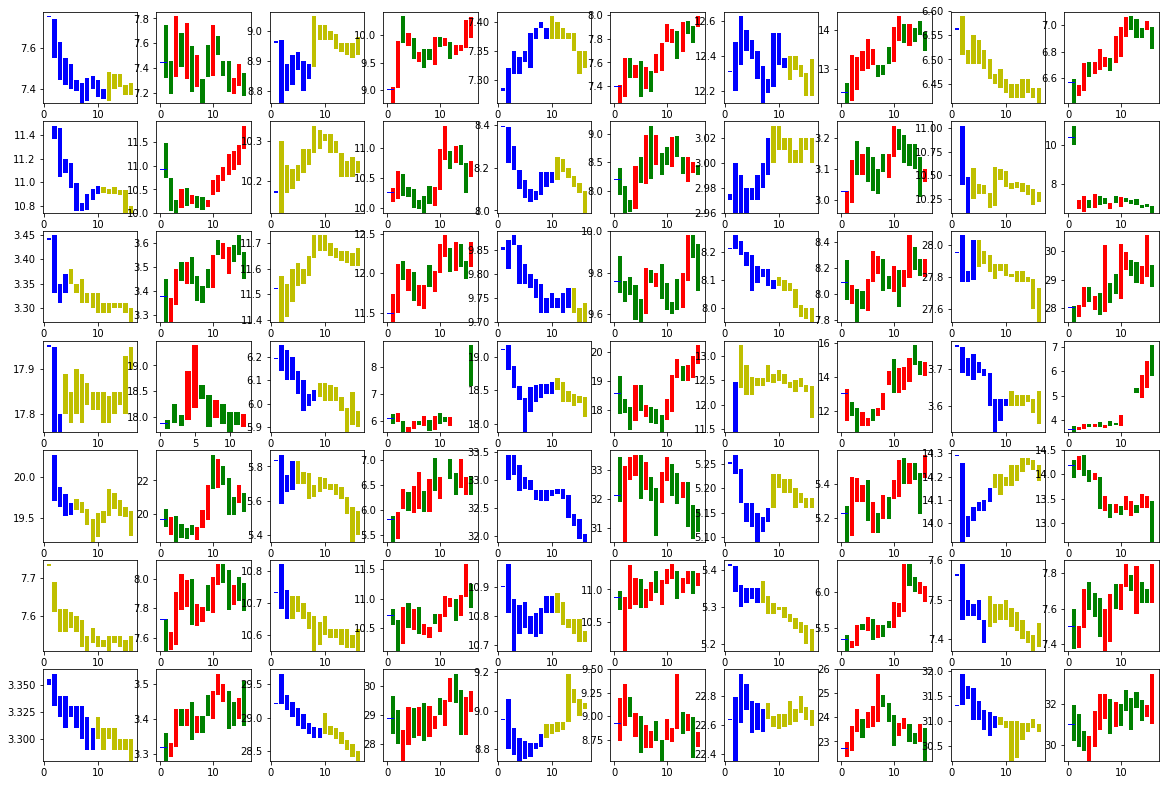

In [6]:
plt.figure(figsize=(20,40),dpi = 72)
fig_no=1
for result_n, result_k in result_df.loc[result_df.direction=='downdown'].iterrows():
    trade_time=datetime.datetime.strptime(result_k.trade_time,'%Y-%m-%d %H:%M:%S')
    price=result_k.trade_price
    delta1 = datetime.timedelta(days=1)    
    delta30 = datetime.timedelta(days=30)
    end_date = trade_time + delta1
    end_time = trade_time + delta30
    min_df = None
    day_df = None
    has_gotdata=False
    time_out_n=0
    while not has_gotdata:
        try:
            min_df = ts.pro_bar(ts_code=result_k.ts_code, asset='E', freq='15min', start_date=trade_time.strftime('%Y%m%d'), end_date=end_date.strftime('%Y%m%d'))
            day_df = pro.daily(ts_code=result_k.ts_code, start_date=trade_time.strftime('%Y%m%d'), end_date=end_time.strftime('%Y%m%d'))
            has_gotdata=True
        except OSError as e:
            print('超频'+str(time_out_n)+'次，换token或sleep...')
            time_out_n+=1
            if time_out_n>1:
                time.sleep(10)
            elif token_current==1:
                ts.set_token(token2)
                token_current=2
            else:
                ts.set_token(token1)
                token_current=1
    min_dfr = min_df.iloc[::-1] #倒序
    min_n_dr = len(min_dfr)
    min_df_dr = min_dfr.iloc[-min_n_dr:-1]
    min_df_dr.index=min_df_dr.index.map(lambda x:min_n_dr-x)
    
    day_dfr = day_df.iloc[::-1] #倒序
    day_n_dr = len(day_dfr)
    day_df_dr = day_dfr.iloc[-day_n_dr:-1]
    day_df_dr.index=day_df_dr.index.map(lambda x:day_n_dr-x)
    #画分钟
    plt.subplot(20,10,fig_no)
    fig_no+=1
    trade_min_n=0
    for n, k in min_df_dr.iterrows():
        low = k.low
        high = k.high
        openn = k.open
        close = k.close
        #画矩形
        this_trade_time = datetime.datetime.strptime(k.trade_time,'%Y-%m-%d %H:%M:%S')
        color='b' if trade_time>this_trade_time else 'y'
        bar_high = high-low if high-low!=0 else 0.005
        plt.bar(n, bar_high, 0.8, low, color=color) 
    
    #画日
    plt.subplot(20,10,fig_no)
    fig_no+=1
    for n, k in day_df_dr.iterrows():
        low = k.low
        high = k.high
        openn = k.open
        close = k.close
        #画矩形
        color='r' if close>openn else 'g'
        bar_high = high-low if high-low!=0 else 0.005
        plt.bar(n, bar_high, 0.8, low, color=color) 
        if n>15:
            break
    #画开始price
    plt.plot([0,1],[price,price],'b-',lw=1)
plt.show()

In [1]:
df_dr

NameError: name 'df_dr' is not defined

In [8]:
outputpath='E:/jupyter/qushi.csv'
result_df.to_csv(outputpath,sep=',',index=True,header=True)